# Mise en pratique - Clustering avec K-means

Cette mise en pratique préente l'application de l'algorithme K-means pour effectuer du clustering non supervisé sur le dataset Iris. 

Le but est de segmenter des observations sur les fleurs Iris en groupes (clusters) en fonction de leurs caractéristiques, telles que la longueur et la largeur des pétales et des sépales.

**Objectifs**

- Entraîner un modèle K-means pour segmenter les fleurs en 3 clusters (spécies d'Iris).
- Visualiser les résultats du clustering et comparer avec les classes réelles (espèces).
- Tester le modèle avec 2, 3, et 4 clusters.
- Utiliser les méthodes Elbow et Silhouette pour déterminer le nombre optimal de clusters.

## Chargement et exploration du dataset

### Chargement des données

In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [14]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [3]:
# Chargement du dataset
iris = datasets.load_iris()

# Convertir les données en df
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Le dataset Iris contient quatre caractéristiques pour chaque fleur : 
- Longueur et largeur des sépales
- Longueur et largeur des pétales

Chaque observation appartient à l'une des trois espèces d'iris : `setosa`, `versicolor`, ou `virginica`.

### Exploration des données

In [4]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Statistiques descriptives
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Vérification des valeurs manquantes
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Standardisation des données

In [7]:
# Normalisation des données (standardisation)
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques
X = df.drop('species', axis=1)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Clustering avec K-means

### Application de K-means avec 3 clusters

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialisation du modèle
model_kmeans_3 = KMeans(n_clusters=3, random_state=42)

# Entrainement
model_kmeans_3.fit(X_scaled)

# Obtenir les centres des clusters
centers_3 = model_kmeans_3.cluster_centers_

# Prédire les labels (clusters) pour chaque point
labels_3 = model_kmeans_3.labels_

### Visualisation (3 clusters)

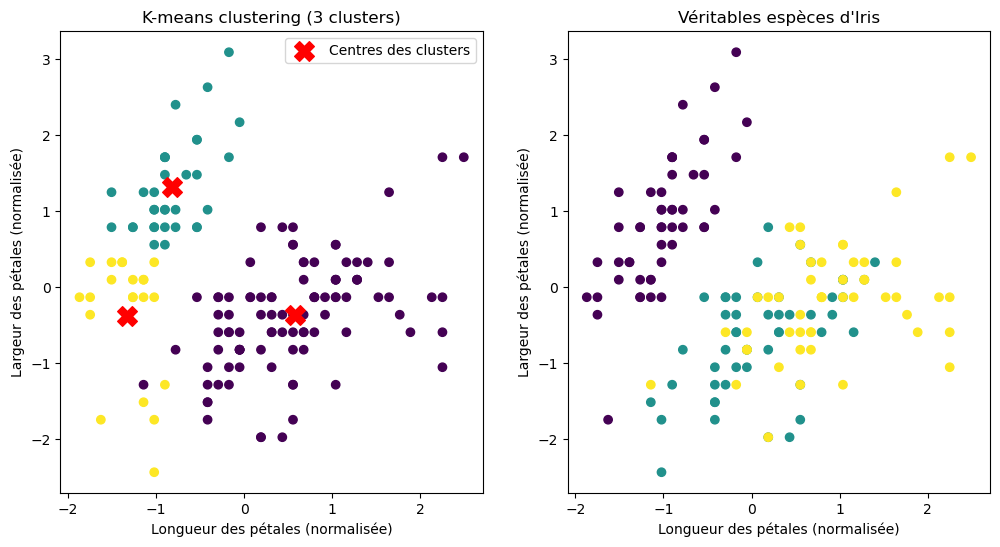

In [10]:
plt.figure(figsize=(12, 6))

# Graphique des clusters avec couleurs différentes
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', marker='X', s=200, label='Centres des clusters')
plt.title("K-means clustering (3 clusters)")
plt.xlabel('Longueur des pétales (normalisée)')
plt.ylabel('Largeur des pétales (normalisée)')
plt.legend()

# Graphique avec les espèces réelles
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['species'].astype('category').cat.codes, cmap='viridis')
plt.title("Véritables espèces d'Iris")
plt.xlabel('Longueur des pétales (normalisée)')
plt.ylabel('Largeur des pétales (normalisée)')
plt.show()

### K-means avec 2 et 4 clusters

In [16]:
# Clustering avec 2 clusters
model_kmeans_2 = KMeans(n_clusters=2, random_state=42)
model_kmeans_2.fit(X_scaled)
labels_2 = model_kmeans_2.labels_
centers_2 = model_kmeans_2.cluster_centers_

# Clustering avec 4 clusters
model_kmeans_4 = KMeans(n_clusters=4, random_state=42)
model_kmeans_4.fit(X_scaled)
labels_4 = model_kmeans_4.labels_
centers_4 = model_kmeans_4.cluster_centers_

### Visualisation 2 et 4 clusters

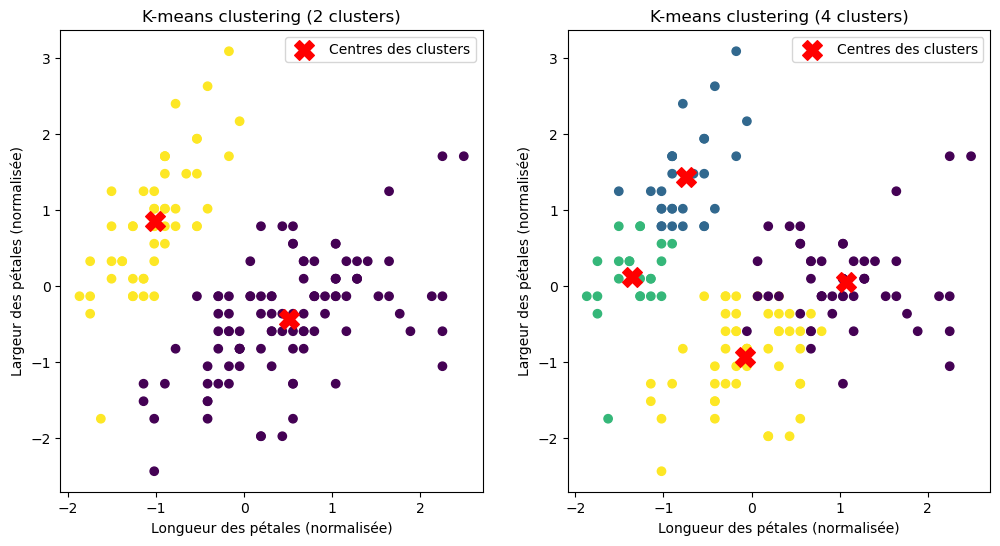

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphique pour 2 clusters
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_2, cmap='viridis')
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], c='red', marker='X', s=200, label='Centres des clusters')
axes[0].set_title("K-means clustering (2 clusters)")
axes[0].set_xlabel('Longueur des pétales (normalisée)')
axes[0].set_ylabel('Largeur des pétales (normalisée)')
axes[0].legend()

# Graphique pour 4 clusters
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_4, cmap='viridis')
axes[1].scatter(centers_4[:, 0], centers_4[:, 1], c='red', marker='X', s=200, label='Centres des clusters')
axes[1].set_title("K-means clustering (4 clusters)")
axes[1].set_xlabel('Longueur des pétales (normalisée)')
axes[1].set_ylabel('Largeur des pétales (normalisée)')
axes[1].legend()

plt.show()

## Évaluation du modèle (Méthode Elbow et Silhouette)

### Méthode Elbow

- La méthode Elbow nous permet de visualiser l'inertie (la compacité des clusters) en fonction du nombre de clusters.
- Le "coude" du graphique indique généralement le nombre optimal de clusters.

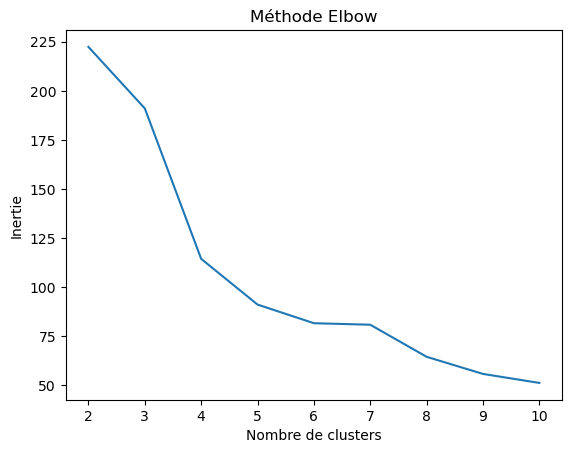

In [17]:
# Méthode Elbow
inertie = []
for k in range(2, 11):
    model_kmeans = KMeans(n_clusters=k, random_state=42)
    model_kmeans.fit(X_scaled)
    inertie.append(model_kmeans.inertia_)

plt.plot(range(2, 11), inertie)
plt.title("Méthode Elbow")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


**Interprétation** :

- Il semble que ce soit 4 clusters le nombre optimal

### Méthode Silhouette

- La méthode Silhouette nous permet de mesurer la qualité du clustering. 
- Un score proche de 1 indique une bonne séparation entre les clusters, tandis qu'un score proche de 0 signifie des clusters peu distincts.

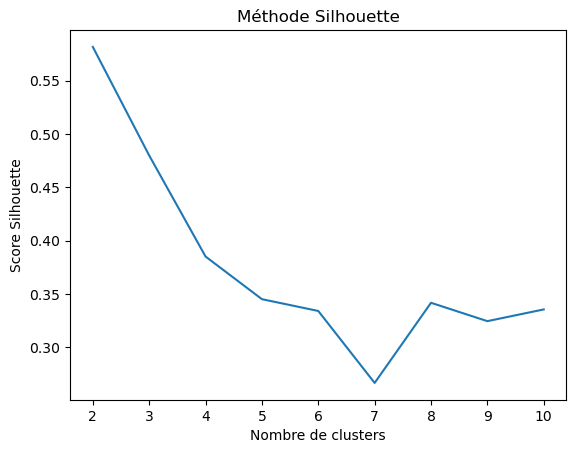

In [18]:
# Méthode Silhouette
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    model_kmeans = KMeans(n_clusters=k, random_state=42)
    model_kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, model_kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title("Méthode Silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score Silhouette")
plt.show()


**Interprétation** :

- En comparaison avec Elbow / le nombre de clusters optimal est 4.